In [1]:
import os
import re
import pandas as pd
from tqdm.notebook import tqdm

from langdetect import detect

from wordcloud import WordCloud
import matplotlib.pyplot as plt

SRC_PATH = 'src/'
FIGHTER1 = 'charles'
FIGHTER2 = 'arman'

fighters_files = os.listdir(SRC_PATH)
n_files = len(fighters_files)

# Build Data #

In [2]:
dfs_fighter1 = []
dfs_fighter2 = []

# Percorra todos os arquivos na pasta
for filename in tqdm(fighters_files, total=n_files):
    # Verifique se o arquivo é um arquivo Excel
    if filename.endswith('.xlsx') or filename.endswith('.xls'):
        # Carregue o arquivo Excel em um DataFrame
        df = pd.read_excel(os.path.join(SRC_PATH, filename))
        parts = filename.split('_')
        df['april_day'] = int(parts[1][:2])
        
        if filename.startswith('charles'):
            dfs_fighter1.append(df)
        elif filename.startswith('arman'):
            dfs_fighter2.append(df)

df_fighter1 = pd.concat(dfs_fighter1, ignore_index=True)
df_fighter2 = pd.concat(dfs_fighter2, ignore_index=True)

  0%|          | 0/38 [00:00<?, ?it/s]

## Charles Do Bronx ##

In [3]:
df_fighter1.head(3)

,author/affiliatesHighlightedLabel/label/badge/url,author/affiliatesHighlightedLabel/label/description,author/affiliatesHighlightedLabel/label/longDescription/entities/0/fromIndex,author/affiliatesHighlightedLabel/label/longDescription/entities/0/ref/mention_results/result/__typename,author/affiliatesHighlightedLabel/label/longDescription/entities/0/ref/mention_results/result/legacy/screen_name,author/affiliatesHighlightedLabel/label/longDescription/entities/0/ref/mention_results/result/rest_id,author/affiliatesHighlightedLabel/label/longDescription/entities/0/ref/screen_name,author/affiliatesHighlightedLabel/label/longDescription/entities/0/ref/type,author/affiliatesHighlightedLabel/label/longDescription/entities/0/toIndex,author/affiliatesHighlightedLabel/label/longDescription/text,...,quote/entities/media/3/features/orig/faces/1/h,quote/entities/media/3/features/orig/faces/1/w,quote/entities/media/3/features/orig/faces/1/x,quote/entities/media/3/features/orig/faces/1/y,quote/entities/media/3/features/small/faces/0/h,quote/entities/media/3/features/small/faces/0/w,quote/entities/media/3/features/small/faces/1/h,quote/entities/media/3/features/small/faces/1/w,quote/entities/media/3/features/small/faces/1/x,quote/entities/media/3/features/small/faces/1/y
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df_fighter1.text

0       Arman Tsarukyan escaped Charles Oliveira’s Gui...
1       Charles Oliveira (Zionist) capping like always...
2       Arman Tsarukyan says the judge who had Charles...
3       Le prime de Charles Oliveira , c’était grandio...
4       Yeni Charles Oliveira editi geldi  https://t.c...
                              ...                        
1790    @furkancerkes iktidar halki fakir biraktigi ic...
1791    @yescontextfb 30 yildir mac seyrederim, ben Fe...
1792    #JudgesGonnaJudge: Did Arman Tsarukyan deserve...
1793    @omer_sagiroglu @fenerrmedya kus beyinli, bile...
1794    Judges Gonna Judge: Did Arman Tsarukyan deserv...
Name: text, Length: 1795, dtype: object

## Arman Tsarukyan ##

In [5]:
df_fighter2.head(3)

,author/canDm,author/canMediaTag,author/coverPicture,author/createdAt,author/description,author/entities/description/urls/0/display_url,author/entities/description/urls/0/expanded_url,author/entities/description/urls/0/indices/0,author/entities/description/urls/0/indices/1,author/entities/description/urls/0/url,...,extendedEntities/media/1/features/all/tags/11/name,extendedEntities/media/1/features/all/tags/11/screen_name,extendedEntities/media/1/features/all/tags/11/type,extendedEntities/media/1/features/all/tags/11/user_id,quote/entities/media/0/additional_media_info/description,quote/entities/media/0/additional_media_info/embeddable,quote/entities/media/0/additional_media_info/title,quote/extendedEntities/media/0/additional_media_info/description,quote/extendedEntities/media/0/additional_media_info/embeddable,quote/extendedEntities/media/0/additional_media_info/title
0,True,False,https://pbs.twimg.com/profile_banners/10819309...,Sun Jan 06 15:10:16 +0000 2019,Propagande Jiu jitsu brésilien pour le MMA.\n\...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,True,True,https://pbs.twimg.com/profile_banners/17393771...,Mon Dec 25 20:07:27 +0000 2023,For all your combat sports needs | contact@ch...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,False,True,https://pbs.twimg.com/profile_banners/16781470...,Sun Jul 09 21:00:20 +0000 2023,Charles Oliveira Max Holloway Jiri Prochazka...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df_fighter2.text

0       Arman Tsarukyan  dans une compèt de jjb, le na...
1       Arman Tsarukyan analyzes Charles Oliveira befo...
2       Arman Tsarukyan loves to throw body kicks I ca...
3       How Arman Tsarukyan fans get ready https://t.c...
4       O Dariush falou que acha que o Arman Tsarukyan...
                              ...                        
1155    While the real African is there https://t.co/q...
1156    eu vendo vendo charles finalizar o tsarukyan n...
1157                   @EdwardsSZN_ Them body kicks bro ‍
1158       @LuizFollone_ @DarkDragonFPS @palmeirasptd Sim
1159    @MMArena_ Tsarukyan qui explose du brésilien e...
Name: text, Length: 1160, dtype: object

# Data Manipulation #

In [7]:
df_fighter1.dropna(subset=['text'], inplace=True)
df_fighter2.dropna(subset=['text'], inplace=True)

In [8]:
def contains_letter(text):
    # Verifica se há pelo menos uma letra (maiúscula ou minúscula) no texto
    return bool(re.search(r'[a-zA-Z]', text))

def remove_urls(text):
    # Regex para detectar URLs
    url_pattern = re.compile(r'http\S+|www\S+|https\S+|ftp\S+|[\w\-]+\.(?:com|org|net|info|biz|gov|edu)\S*')
    return url_pattern.sub(r'', text)

# Removendo url's 
df_fighter1['text'] = df_fighter1['text'].apply(remove_urls)
df_fighter2['text'] = df_fighter2['text'].apply(remove_urls)

# Removendo amostras sem conteúdo
df_fighter1['contains_letter'] = df_fighter1['text'].apply(contains_letter)
df_fighter2['contains_letter'] = df_fighter2['text'].apply(contains_letter)

df_fighter1 = df_fighter1[df_fighter1['contains_letter'] == True]
df_fighter2 = df_fighter2[df_fighter2['contains_letter'] == True]

/tmp/ipykernel_4681/2522243092.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_fighter1['contains_letter'] = df_fighter1['text'].apply(contains_letter)


## Language Detection ##

In [9]:
def detect_language_safe(text):
    try:
        return detect(text)
    except Exception as e:
        print(f"Error: {str(e)} at {text}")
        return 'unknown'

### Testing langdetect ###

In [10]:
tweet = df_fighter1.iloc[0].text

print(tweet)
print(detect(tweet))

Arman Tsarukyan escaped Charles Oliveira’s Guillotine by pulling his own pants down

He needs to be disqualified for this 
en


In [11]:
df_fighter1['language'] = df_fighter1['text'].apply(detect_language_safe)
df_fighter2['language'] = df_fighter2['text'].apply(detect_language_safe)

/tmp/ipykernel_4681/393306289.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_fighter1['language'] = df_fighter1['text'].apply(detect_language_safe)


# EDA #

In [12]:
def remove_strings_from_text(text, strings_to_remove):
    for s in strings_to_remove:
        # Compilar a string com a flag re.IGNORECASE
        pattern = re.compile(re.escape(s), re.IGNORECASE)
        # Substituir todas as ocorrências, ignorando o caso
        text = pattern.sub('', text)
    return text

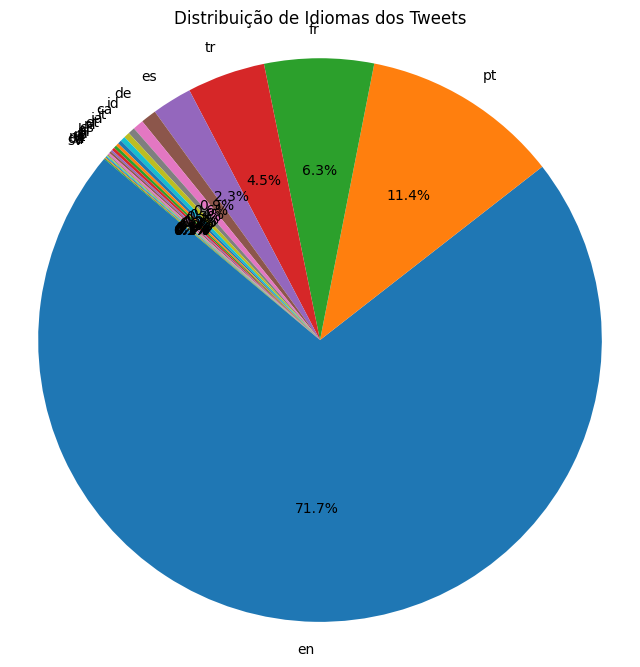

In [13]:
# Contar a frequência de cada idioma
language_counts = df_fighter1['language'].value_counts()

# Plotar o gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(language_counts, labels=language_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribuição de Idiomas dos Tweets')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

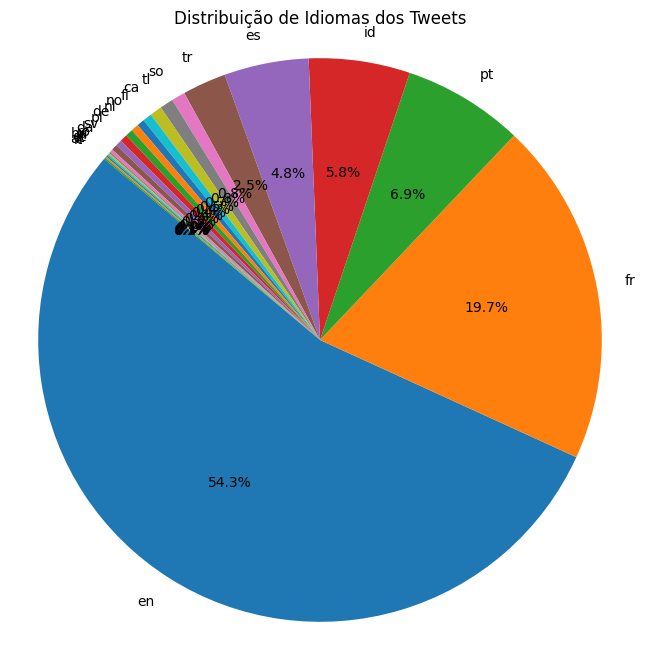

In [14]:
# Contar a frequência de cada idioma
language_counts = df_fighter2['language'].value_counts()

# Plotar o gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(language_counts, labels=language_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribuição de Idiomas dos Tweets')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

## Charles do Bronx ##

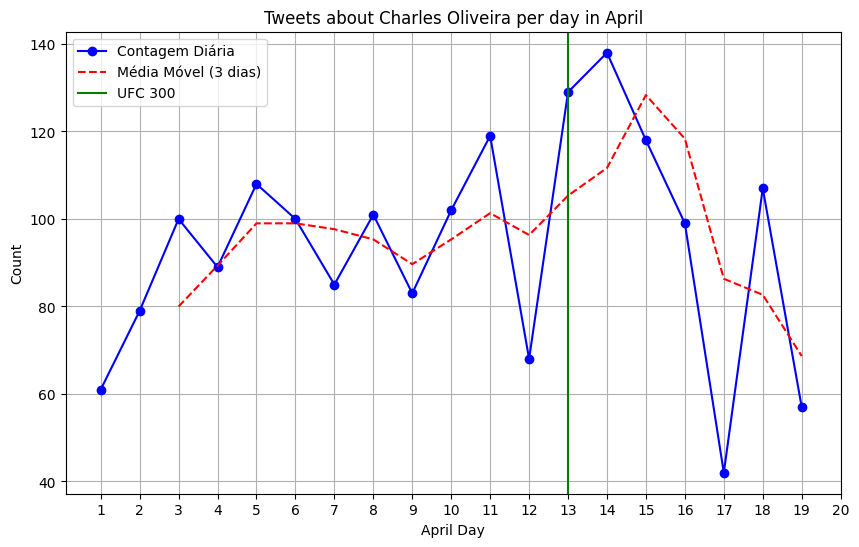

In [15]:
counts = df_fighter1['april_day'].value_counts().sort_index()

# Calcular a média móvel com uma janela de 3 (por exemplo)
rolling_mean = counts.rolling(window=3).mean()

# Plotando o gráfico de linhas com a média móvel
plt.figure(figsize=(10, 6))
plt.plot(counts.index, counts.values, marker='o', linestyle='-', color='b', label='Contagem Diária')
plt.plot(rolling_mean.index, rolling_mean.values, linestyle='--', color='r', label='Média Móvel (3 dias)')
# Adicionando uma linha vertical em april_day = 13
plt.axvline(x=13, color='g', linestyle='-', label='UFC 300')
plt.xticks(range(1, 21))  # Ajustar os rótulos do eixo x
plt.xlabel('April Day')
plt.ylabel('Count')
plt.title('Tweets about Charles Oliveira per day in April')
plt.legend()
plt.grid(True)
plt.show()

### Before UFC 300 ###

In [16]:
df = df_fighter1[df_fighter1['april_day'] < 13].copy()

strings_to_rmv = ['Charles', 'Bronx', 'Oliveira', 'do', 'de', 'ufc', '300', 'fight', 'carlo', 'arman', 'tsarukyan', 'da', 'que', 'em', 'na', 'eu', 'uma', 'meu', 'um']
df['text'] = df['text'].apply(lambda x: remove_strings_from_text(x, strings_to_rmv))

In [17]:
df_en = df[df['language'] == 'en']
df_pt = df[df['language'] == 'pt']
df_fr = df[df['language'] == 'fr']

#### English ####

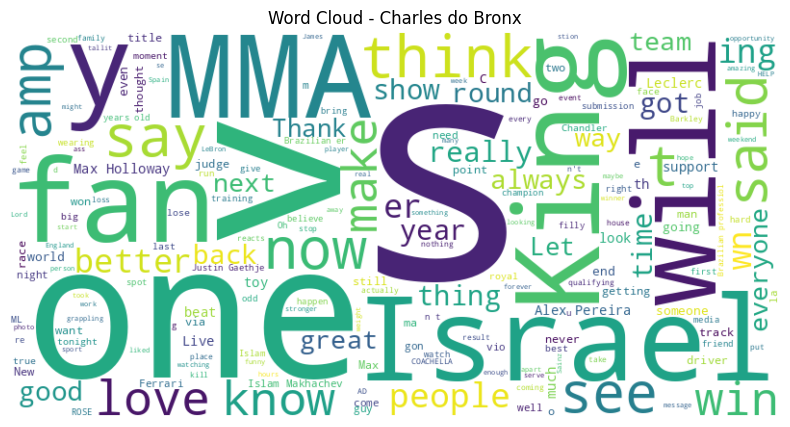

In [48]:
text = " ".join(review for review in df_en.text)

# Gerar a nuvem de palavras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plotar a nuvem de palavras
plt.figure(figsize=(10, 5))
plt.title('Word Cloud - Charles do Bronx')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### Portuguese ####

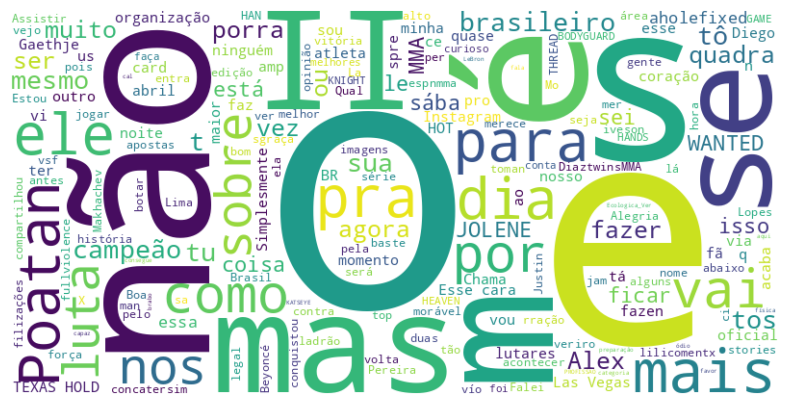

In [19]:
text = " ".join(review for review in df_pt.text)

# Gerar a nuvem de palavras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plotar a nuvem de palavras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### French ####

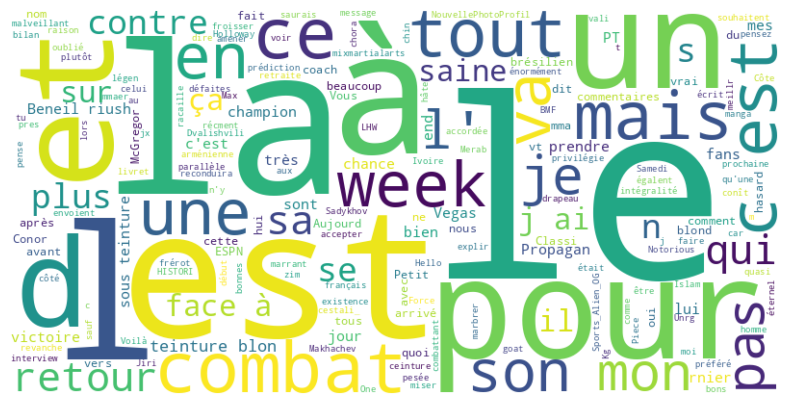

In [20]:
text = " ".join(review for review in df_fr.text)

# Gerar a nuvem de palavras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plotar a nuvem de palavras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### After UFC 300 ###

In [21]:
df = df_fighter1[df_fighter1['april_day'] >= 13].copy()

strings_to_rmv = ['Charles', 'Bronx', 'Oliveira', 'do', 'de', 'ufc', '300', 'fight', 'carlo', 'arman', 'tsarukyan', 'da', 'que', 'em', 'na', 'eu', 'uma', 'meu', 'um']
df['text'] = df['text'].apply(lambda x: remove_strings_from_text(x, strings_to_rmv))

In [22]:
df_en = df[df['language'] == 'en']
df_pt = df[df['language'] == 'pt']
df_fr = df[df['language'] == 'fr']

#### English ####

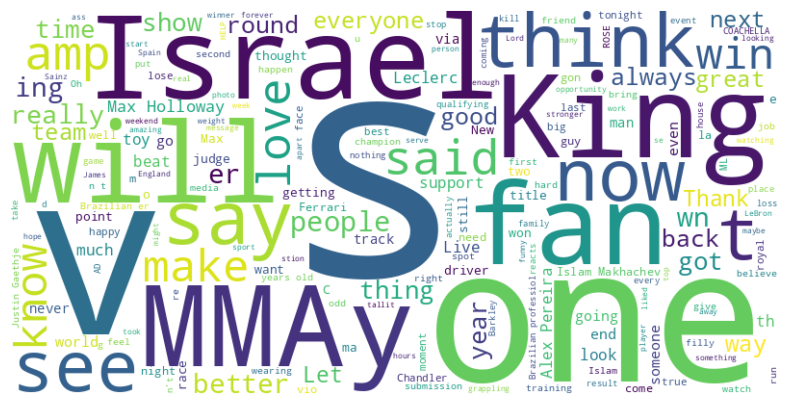

In [23]:
text = " ".join(review for review in df_en.text)

# Gerar a nuvem de palavras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plotar a nuvem de palavras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### Portuguese ####

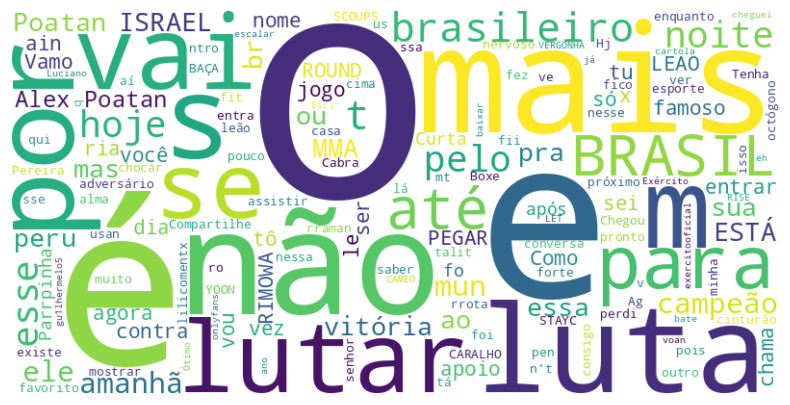

In [24]:
text = " ".join(review for review in df_pt.text)

# Gerar a nuvem de palavras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plotar a nuvem de palavras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### French ####

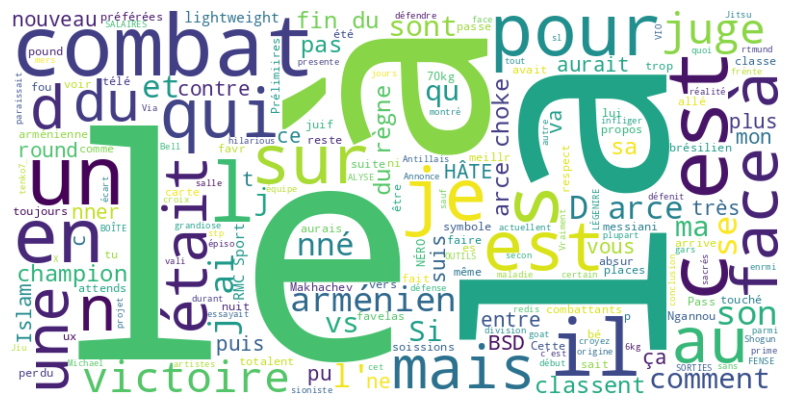

In [25]:
text = " ".join(review for review in df_fr.text)

# Gerar a nuvem de palavras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plotar a nuvem de palavras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Arman Tsarukyan ##

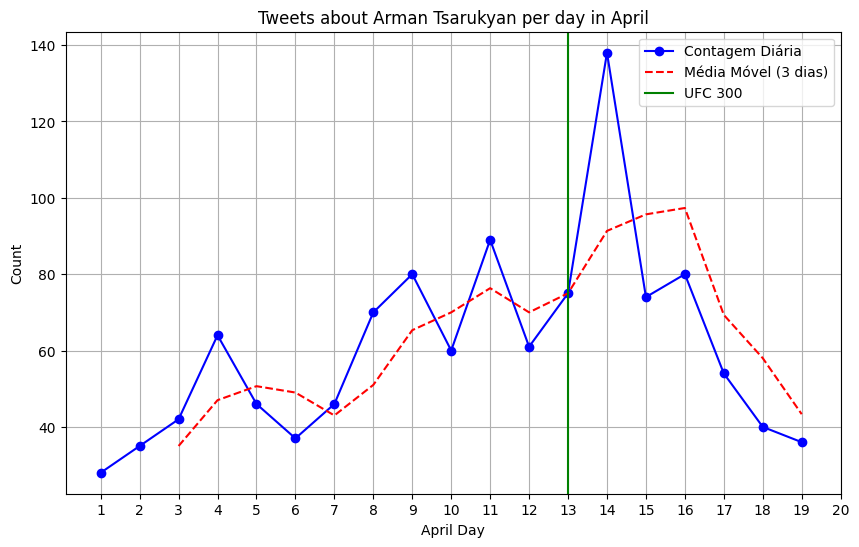

In [26]:
counts = df_fighter2['april_day'].value_counts().sort_index()

# Calcular a média móvel com uma janela de 3 (por exemplo)
rolling_mean = counts.rolling(window=3).mean()

# Plotando o gráfico de linhas com a média móvel
plt.figure(figsize=(10, 6))
plt.plot(counts.index, counts.values, marker='o', linestyle='-', color='b', label='Contagem Diária')
plt.plot(rolling_mean.index, rolling_mean.values, linestyle='--', color='r', label='Média Móvel (3 dias)')
# Adicionando uma linha vertical em april_day = 13
plt.axvline(x=13, color='g', linestyle='-', label='UFC 300')
plt.xticks(range(1, 21))  # Ajustar os rótulos do eixo x
plt.xlabel('April Day')
plt.ylabel('Count')
plt.title('Tweets about Arman Tsarukyan per day in April')
plt.legend()
plt.grid(True)
plt.show()

# Análise de Sentimentos #

In [27]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Baixar os dados necessários do NLTK
nltk.download('vader_lexicon')

# Criar um analisador de sentimentos
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/rafael/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


## Testing Vader ## 

In [28]:
df_fighter1.iloc[2].text

'Arman Tsarukyan says the judge who had Charles Oliveira winning their fight called him and apologized for his \'mistake\'.\n\nHe also says he would\'ve killed that judge if he ended up losing the fight \n\n"Definitely if I lose this fight, I would kill him yea. He\'s gonna kill my career. I\'ve been training like 10 years, nonstop... and like some judge, maybe he was watching his phone. But like, now we\'re good."\n\n YT / @dc_mma #UFC #MMA'

In [29]:
sia.polarity_scores(df_fighter1.iloc[2].text)

{'neg': 0.195, 'neu': 0.667, 'pos': 0.138, 'compound': -0.6187}

## Charles do Bronx ##

In [30]:
df =  df_fighter1.copy()

strings_to_rmv = ['Charles', 'Bronx', 'Oliveira', 'do', 'de', 'ufc', '300', 'fight', 'carlo', 'arman', 'tsarukyan', 'da', 'que', 'em', 'na', 'eu', 'uma', 'meu', 'um']
df['text'] = df['text'].apply(lambda x: remove_strings_from_text(x, strings_to_rmv))

In [31]:
df[['neg', 'neu', 'pos', 'compound']] = df['text'].apply(lambda x: pd.Series(sia.polarity_scores(x)))

In [32]:
df[df['language'] == 'en']['compound'].value_counts(dropna=False)

compound
 0.0000    362
-0.2960     25
 0.5859     15
 0.4404     14
 0.4019     12
          ... 
 0.2309      1
 0.5413      1
 0.8342      1
-0.6662      1
 0.9422      1
Name: count, Length: 457, dtype: int64

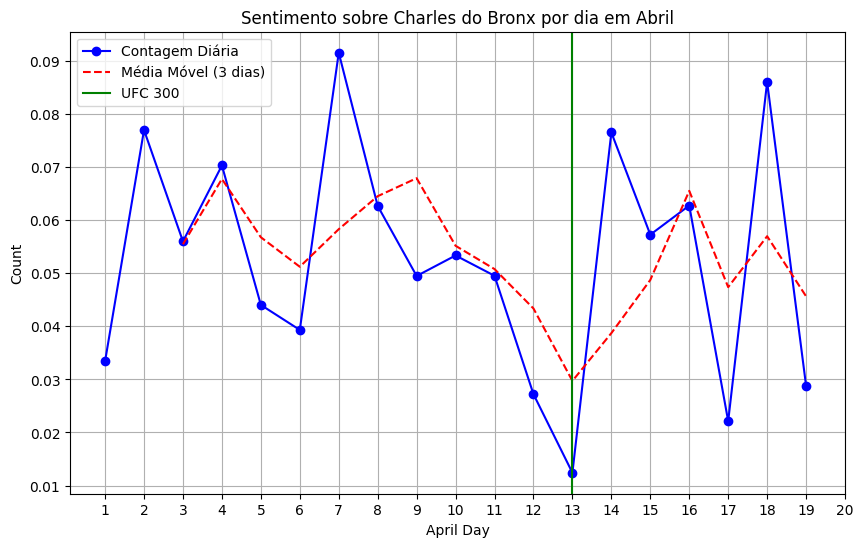

In [33]:
total = df['compound'].sum()
counts = df.groupby('april_day')['compound'].sum()/total

rolling_mean = counts.rolling(window=3).mean()

# Plotando o gráfico de linhas com a média móvel
plt.figure(figsize=(10, 6))
plt.plot(counts.index, counts.values, marker='o', linestyle='-', color='b', label='Contagem Diária')
plt.plot(rolling_mean.index, rolling_mean.values, linestyle='--', color='r', label='Média Móvel (3 dias)')
# Adicionando uma linha vertical em april_day = 13
plt.axvline(x=13, color='g', linestyle='-', label='UFC 300')
plt.xticks(range(1, 21))  # Ajustar os rótulos do eixo x
plt.xlabel('April Day')
plt.ylabel('Count')
plt.title('Sentimento sobre Charles do Bronx por dia em Abril')
plt.legend()
plt.grid(True)
plt.show()

## Arman Tsarukyan ##

In [34]:
df =  df_fighter2.copy()

strings_to_rmv = ['Charles', 'Bronx', 'Oliveira', 'do', 'de', 'ufc', '300', 'fight', 'carlo', 'arman', 'tsarukyan', 'da', 'que', 'em', 'na', 'eu', 'uma', 'meu', 'um']
df['text'] = df['text'].apply(lambda x: remove_strings_from_text(x, strings_to_rmv))

In [35]:
df[['neg', 'neu', 'pos', 'compound']] = df['text'].apply(lambda x: pd.Series(sia.polarity_scores(x)))

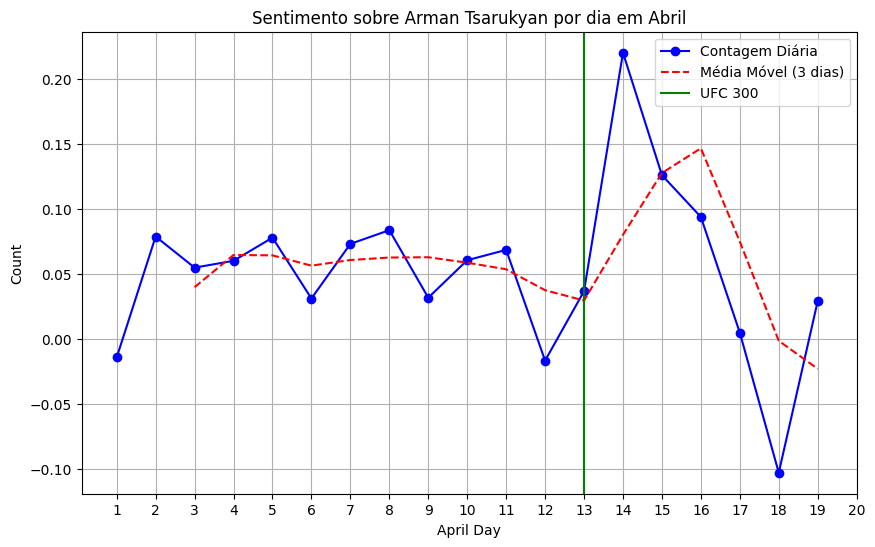

In [39]:
total = df['compound'].sum()
counts = df.groupby('april_day')['compound'].sum()/total

rolling_mean_arman = counts.rolling(window=3).mean()

# Plotando o gráfico de linhas com a média móvel
plt.figure(figsize=(10, 6))
plt.plot(counts.index, counts.values, marker='o', linestyle='-', color='b', label='Contagem Diária')
plt.plot(rolling_mean.index, rolling_mean_arman.values, linestyle='--', color='r', label='Média Móvel (3 dias)')
# Adicionando uma linha vertical em april_day = 13
plt.axvline(x=13, color='g', linestyle='-', label='UFC 300')
plt.xticks(range(1, 21))  # Ajustar os rótulos do eixo x
plt.xlabel('April Day')
plt.ylabel('Count')
plt.title('Sentimento sobre Arman Tsarukyan por dia em Abril')
plt.legend()
plt.grid(True)
plt.show()

## Plots ##

In [37]:
df_arman =  df_fighter2.copy()

df_arman['text'] = df_arman['text'].apply(lambda x: remove_strings_from_text(x, strings_to_rmv))
df_arman[['neg', 'neu', 'pos', 'compound']] = df_arman['text'].apply(lambda x: pd.Series(sia.polarity_scores(x)))

In [38]:
df_charles =  df_fighter1.copy()

df_charles['text'] = df_charles['text'].apply(lambda x: remove_strings_from_text(x, strings_to_rmv))
df_charles[['neg', 'neu', 'pos', 'compound']] = df_charles['text'].apply(lambda x: pd.Series(sia.polarity_scores(x)))

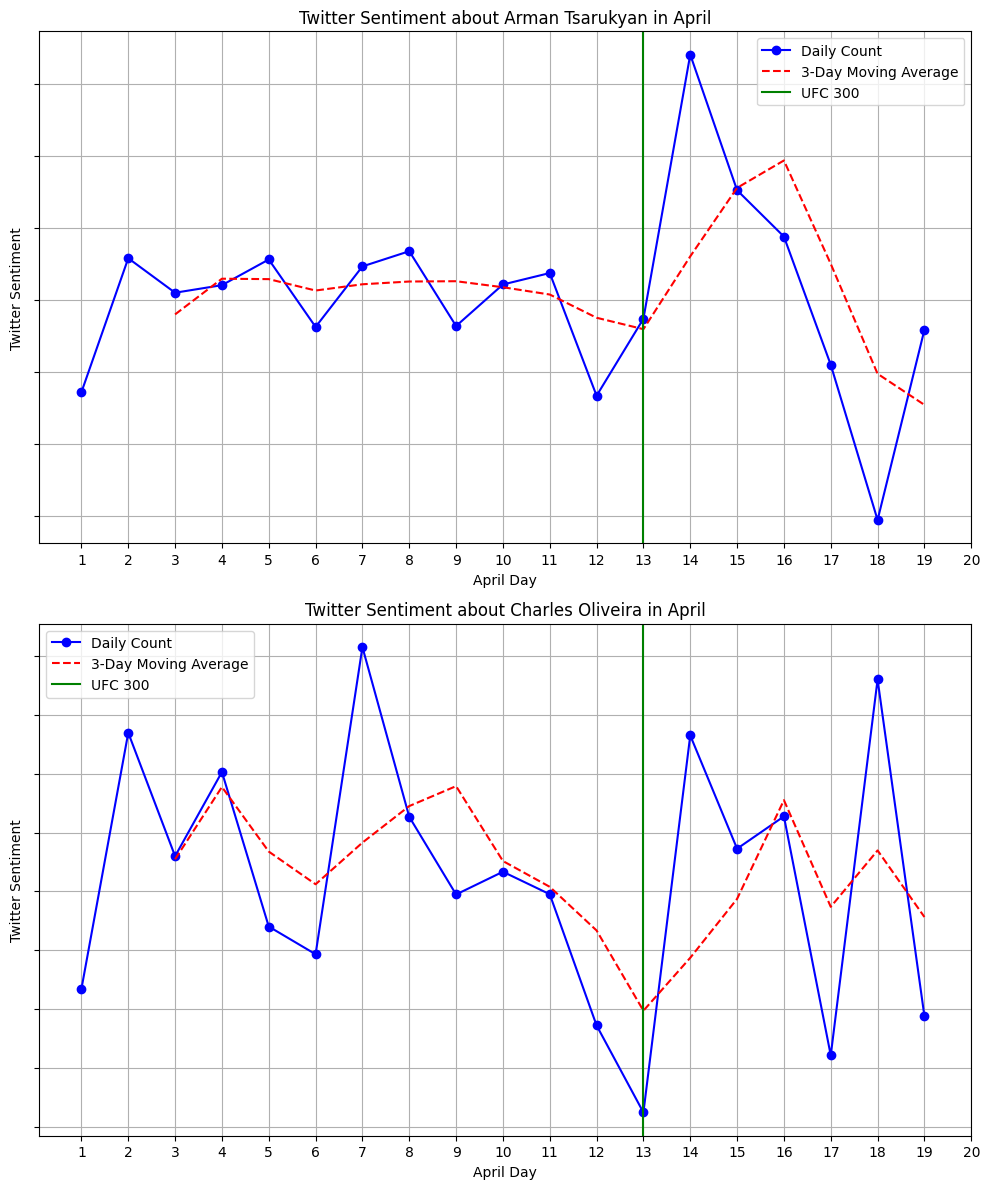

In [47]:
import matplotlib.pyplot as plt

# Calcular total e counts para Arman
total_arman = df_arman['compound'].sum()
counts_arman = df_arman.groupby('april_day')['compound'].sum() / total_arman
rolling_mean_arman = counts_arman.rolling(window=3).mean()

# Calcular total e counts para Charles
total_charles = df_charles['compound'].sum()
counts_charles = df_charles.groupby('april_day')['compound'].sum() / total_charles
rolling_mean_charles = counts_charles.rolling(window=3).mean()

# Criar subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# Plotar gráfico de Arman
axs[0].plot(counts_arman.index, counts_arman.values, marker='o', linestyle='-', color='b', label='Daily Count')
axs[0].plot(rolling_mean_arman.index, rolling_mean_arman.values, linestyle='--', color='r', label='3-Day Moving Average')
axs[0].axvline(x=13, color='g', linestyle='-', label='UFC 300')
axs[0].set_xticks(range(1, 21))
axs[0].set_xlabel('April Day')
axs[0].set_ylabel('Twitter Sentiment')
axs[0].set_title('Twitter Sentiment about Arman Tsarukyan in April')
axs[0].legend()
axs[0].grid(True)
# Ocultar valores do eixo y
axs[0].set_yticklabels([])

# Plotar gráfico de Charles
axs[1].plot(counts_charles.index, counts_charles.values, marker='o', linestyle='-', color='b', label='Daily Count')
axs[1].plot(rolling_mean_charles.index, rolling_mean_charles.values, linestyle='--', color='r', label='3-Day Moving Average')
axs[1].axvline(x=13, color='g', linestyle='-', label='UFC 300')
axs[1].set_xticks(range(1, 21))
axs[1].set_xlabel('April Day')
axs[1].set_ylabel('Twitter Sentiment')
axs[1].set_title('Twitter Sentiment about Charles Oliveira in April')
axs[1].legend()
axs[1].grid(True)
# Ocultar valores do eixo y
axs[1].set_yticklabels([])

# Ajustar layout
plt.tight_layout()

# Mostrar o gráfico
plt.show()
